In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('final_final_final.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272440 entries, 0 to 272439
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   created_at               272440 non-null  object 
 1   like_count               272440 non-null  int64  
 2   quote_count              245691 non-null  float64
 3   reply_count              272440 non-null  int64  
 4   retweet_count            272440 non-null  int64  
 5   full_text                272440 non-null  object 
 6   coin_id                  272440 non-null  object 
 7   datasource               272440 non-null  object 
 8   clean_text               272440 non-null  object 
 9   sentiment_probabilities  272440 non-null  object 
 10  highest_prob_label       272440 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 22.9+ MB


In [32]:
data[data.created_at == '2/15/21']


,created_at,like_count,quote_count,reply_count,retweet_count,full_text,coin_id,datasource,clean_text,sentiment_probabilities,highest_prob_label
1712,2/15/21,0,0.0,0,0,@elonmusk You should support $sfp #sfp too,sfp,othertweets,support sfp sfp,"OrderedDict([('neutral', 0.9157), ('positive',...",neutral
1713,2/15/21,0,0.0,0,0,@Bridge_Mutual will serve as the smart contrac...,sfp,othertweets,serve smart contract stable coin centralized p...,"OrderedDict([('neutral', 0.8805), ('positive',...",neutral
1714,2/15/21,0,0.0,0,0,🔥 SafePal Wallet Valentine Airdrop 🔥\n\n🎁 Rewa...,sfp,othertweets,safepal wallet valentine airdrop reward pool 3...,"OrderedDict([('neutral', 0.8465), ('positive',...",neutral
1715,2/15/21,0,0.0,0,0,$BTG #BTG go to moon 🚀🚀@elonmusk @WSBChairman ...,sfp,othertweets,btg btg go moon btc eth bnb xrp xlm crv yfi al...,"OrderedDict([('neutral', 0.9126), ('positive',...",neutral
1716,2/15/21,2,2.0,2,2,DA FUCK!!! WHATS GOIN ON!!!!!\n $ADA $LUNA $LI...,sfp,othertweets,da fuck goin ada luna lit sfp,"OrderedDict([('neutral', 0.931), ('positive', ...",neutral
...,...,...,...,...,...,...,...,...,...,...,...
1981,2/15/21,0,0.0,0,0,Student Coin is the first platform that allows...,stc,othertweets,student coin first platform allows user easily...,"OrderedDict([('neutral', 0.8967), ('positive',...",neutral
1982,2/15/21,3,NaN,0,2,hang on for a bumpy ride: btc 30d annualized v...,btc,influtweets,hang bumpy ride btc 30d annualized volatility ...,"OrderedDict([('positive', 0.8797), ('neutral',...",positive
1983,2/15/21,3,NaN,0,2,hang on for a bumpy ride: btc 30d annualized v...,gt,influtweets,hang bumpy ride btc 30d annualized volatility ...,"OrderedDict([('positive', 0.8797), ('neutral',...",positive
1984,2/15/21,2212,NaN,418,557,a doc detailing a proposal for the first hard ...,eth,influtweets,doc detailing proposal first hard fork tentati...,"OrderedDict([('neutral', 0.7664), ('positive',...",neutral


In [31]:
# How many Days Are there in the Whole Dataset
len(data.created_at.unique())

858

In [33]:
# How many Tweets Per Day
data['created_at'] = pd.to_datetime(data['created_at'], format='%m/%d/%y')

# Group by date and count the entries
daily_counts = data.groupby(data['created_at'].dt.date).size().reset_index(name='count')

# Sort Results By Date
daily_counts = daily_counts.sort_values(by='created_at')

In [69]:
daily_counts

,created_at,count
0,2021-02-01,11
1,2021-02-02,11
2,2021-02-03,18
3,2021-02-04,20
4,2021-02-05,25
...,...,...
853,2023-06-08,264
854,2023-06-09,404
855,2023-06-10,269
856,2023-06-11,198


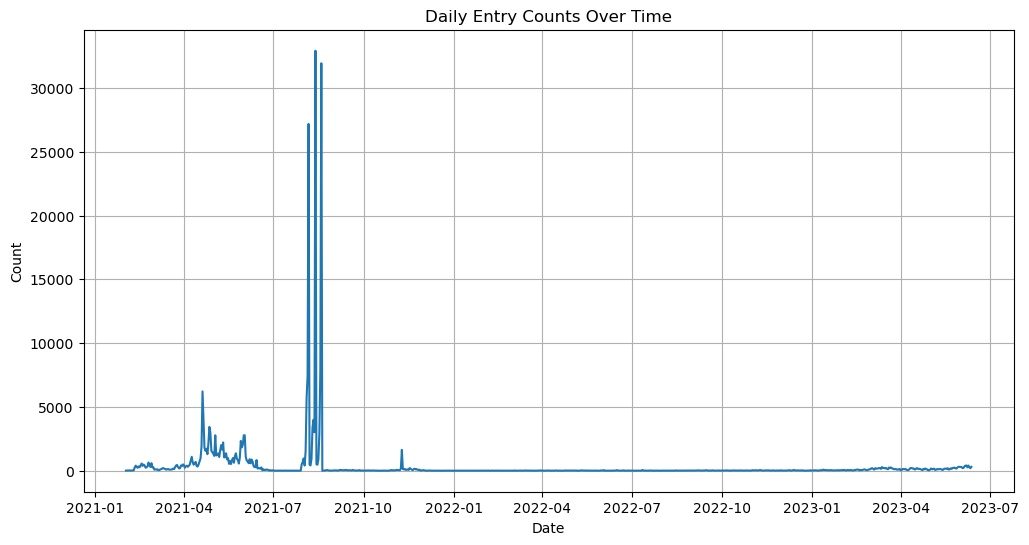

In [35]:
# Tweets Per Day Plotted

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_counts['created_at'], daily_counts['count'])
plt.title('Daily Entry Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [42]:
from scipy import stats

# Calculate mean, median, and standard deviation
mean = daily_counts['count'].mean()
median = daily_counts['count'].median()
std_dev = daily_counts['count'].std()

# Calculate mode using scipy.stats.mode, which can return multiple modes if they exist
mode_result = stats.mode(daily_counts['count'])
mode = mode_result.mode
mode_count = mode_result.count[0]

# Display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Mode(s): {', '.join(map(str, mode))} (Count: {mode_count})")

Mean: 317.52913752913753
Median: 22.0
Standard Deviation: 1918.6545885868034
Mode(s): 6 (Count: 33)


/var/folders/02/ctjwmbv97xn4qlw4lrnhy6240000gn/T/ipykernel_7513/151234279.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(daily_counts['count'])


In [43]:
data.coin_id.unique()

array(['btc', 'amp', 'eth', 'stc', 'doge', 'link', 'usdt', 'usd', 'elon',
       'aave', 'rly', 'knc', 'zrx', 'joe', 'xrp', 'ada', 'dot', 'ever',
       'near', 'win', 'qtum', 'sfp', 'zec', 'dgb', 'safe', 'ltc', 'gt',
       'request', 'acm', 'ramen', 'ray', 'mask', 'binance', 'huobi',
       'trx', 'arc', 'bnt', 'belt', 'tara', 'defit', 'perp', 'etha',
       'dai', 'safemars', 'orao', 'ven', 'gusd', 'cook', 'etc', 'mana',
       'xmr', 'boson', 'cere', 'uni', 'cspr', 'rose', 'usdc', 'fine',
       'husd', 'busd', 'krypto', 'xnl', 'shib', 'flow', 'wec', 'cake',
       'latte', 'hotcross', 'cow', 'cfg', 'less', 'mkr', 'nft', 'ren',
       'safebtc', 'chz', 'sol', 'itgr', 'algo', 'bzz', 'hmt', 'audio',
       'metis', 'metisdao', 'rune', 'sushi', 'sand', 'gala', 'ygg', 'bnb',
       'bsv', 'palg', 'dydx', 'matic', 'avax', 'poly', 'coin98', 'iotx',
       'sc', 'tup', '1inch', 'serum', 'waxp', 'ftm', 'spell', 'mpt',
       'luna', 'usdp', 'dmz', 'ar', 'egld', 'icp', 'forex', 'hbar', 'okb

In [85]:
len(data.coin_id.unique())

267

In [65]:
apcoins = ['ZRX-USD', 'ZEC-USD', 'YFI-USD', 'WBTC-USD', 'UNI-USD', 'UMA-USD', 'SNX-USD',  'LINK-USD', 'KNC-USD', 'FIL-USD', 'ETH-USD', 'ETC-USD', 'DAI-USD', 'BTC-USD', 'ATOM-USD', 'AAVE-USD', 
'ALGO-USD']

for i in range(len(apcoins)):
    apcoins[i] = apcoins[i].split('-')[0].lower()


In [68]:
for each in apcoins:
    if each in data.coin_id.unique():
        print(f'{each} is a coin')
    else:
        print(f'{each} is NOT a coin')

zrx is a coin
zec is a coin
yfi is a coin
wbtc is a coin
uni is a coin
uma is a coin
snx is a coin
link is a coin
knc is a coin
fil is a coin
eth is a coin
etc is a coin
dai is a coin
btc is a coin
atom is a coin
aave is a coin
algo is a coin


In [73]:
coincounts = data.groupby(data['coin_id']).size().reset_index(name='count')
coincounts = coincounts[coincounts.coin_id.isin(apcoins)]
# filtered_df = df[df['coin_id'].isin(apcoins)]
coincounts = coincounts.reset_index()


In [84]:
'''The count of tweets per coin. Even assuming one tweet per day, we wont have full coverage. 
We cant impute 700/850 days'''

coincounts = coincounts.drop(columns='index')
coincounts

,coin_id,count
0,aave,74
1,algo,88
2,atom,61
3,btc,37401
4,dai,42
5,etc,165
6,eth,33249
7,fil,33
8,knc,4
9,link,475


In [94]:
# Drop off below a Threshold. 50-100 tweets minimum. 

subapcoins = [coin_id for coin_id, count in zip(coincounts['coin_id'], 
                                                coincounts['count']) if count > 50 ]
subapcoins

['aave',
 'algo',
 'atom',
 'btc',
 'etc',
 'eth',
 'link',
 'snx',
 'uni',
 'wbtc',
 'zec']

if its not btc or eth, getting a daily score is TUFF. This is among the ones we see. 

In [98]:
# Subset of the Data, that has both price and sentiment data, above threshold.
subdata = data[data.coin_id.isin(subapcoins)]

In [99]:
# Calculate Weights of Each Coin, and Normalize.

def calculate_weights(df):
    # Count the number of tweets per coin
    tweet_counts = df['coin_id'].value_counts()

    # Calculate weights: Inverse of tweet count, normalized
    weights = 1 / tweet_counts
    normalized_weights = weights / weights.sum()

    return normalized_weights

weights = calculate_weights(subdata)


In [100]:
weights

btc     0.000274
eth     0.000308
link    0.021574
etc     0.062106
uni     0.085396
zec     0.105644
algo    0.116449
wbtc    0.128093
aave    0.138479
atom    0.167991
snx     0.173686
Name: coin_id, dtype: float64

In [103]:
subdata.sentiment_probabilities[0]

"OrderedDict([('neutral', 0.9376), ('positive', 0.0352), ('negative', 0.0272)])"

In [107]:
# Split up the Scores from Parth
import re

def extract_scores(sentiment_str):
    
    # Extract the part of the str within brackets
    bracket_content = re.search(r"\[(.*?)\]", sentiment_str).group(1)
    
    # Find all num vals in the extracted str
    scores = re.findall(r"'([a-zA-Z]+)', ([0-9.]+)", bracket_content)
    
    # Convert to dict
    return {score[0]: float(score[1]) for score in scores}


In [108]:
extract_scores(subdata.sentiment_probabilities[0])

{'neutral': 0.9376, 'positive': 0.0352, 'negative': 0.0272}

In [109]:
# Apply the function to each row and split into separate columns
df_scores = subdata['sentiment_probabilities'].apply(lambda x: pd.Series(extract_scores(x)))

subdata = pd.concat([subdata, df_scores], axis=1)

# Drop the Sentiment Scores
subdata.drop('sentiment_probabilities', axis=1, inplace=True)

In [110]:
subdata

,created_at,like_count,quote_count,reply_count,retweet_count,full_text,coin_id,datasource,clean_text,highest_prob_label,neutral,positive,negative
0,2021-02-01,154,NaN,18,23,#privacy is a human right. learn how to make y...,btc,influtweets,privacy human right learn make bitcoin transac...,neutral,0.9376,0.0352,0.0272
2,2021-02-01,65,NaN,8,13,attended any of the 30+ livestream events iâ...,btc,influtweets,attended 30 livestream event ive held last yea...,neutral,0.8426,0.1452,0.0122
3,2021-02-01,65,NaN,8,13,attended any of the 30+ livestream events iâ...,eth,influtweets,attended 30 livestream event ive held last yea...,neutral,0.8426,0.1452,0.0122
5,2021-02-01,7,NaN,0,2,the grayscale premium represents the differenc...,btc,influtweets,grayscale premium represents difference market...,negative,0.0187,0.0199,0.9614
6,2021-02-01,0,NaN,0,7,rt @reg_mati: la privacidad es un derecho huma...,btc,influtweets,rt la privacidad e un derecho humano mir el vi...,positive,0.3311,0.6332,0.0357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272418,2023-06-12,7718,NaN,614,1759,just in: ð¨ð³ chinese bank boci issues cou...,eth,influtweets,chinese bank boci issue country first tokenize...,neutral,0.9290,0.0568,0.0141
272424,2023-06-12,1,NaN,9,0,new gap cme - 26400 ð\n\nno better time to ...,eth,influtweets,new gap cme 26400 not_ better time join 60 cli...,neutral,0.9177,0.0470,0.0353
272425,2023-06-12,1,NaN,9,0,new gap cme - 26400 ð\n\nno better time to ...,btc,influtweets,new gap cme 26400 not_ better time join 60 cli...,neutral,0.9177,0.0470,0.0353
272434,2023-06-12,0,NaN,0,8,rt @crypto_crib_: ð²chinese bank boci issues...,eth,influtweets,rt chinese bank boci issue country first token...,neutral,0.9210,0.0659,0.0131


In [111]:
# Return the Daily Weighted Score Per Coin

def weighted_sentiment(df, weights):
    
    # Calculate daily sentiment scores per coin
    daily_scores = df.groupby(['created_at', 'coin_id']).mean()

    # Apply weights to the sentiment scores
    for coin in weights.index:
        daily_scores.loc[daily_scores.index.get_level_values('coin_id') == coin, ['positive', 
                                                                               'negative', 
                                                                               'neutral']] *= weights[coin]

    # Sum the weighted scores for each day
    daily_weighted_scores = daily_scores.groupby(level='created_at').sum()

    return daily_weighted_scores

daily_weighted_scores = weighted_sentiment(subdata, weights)


/var/folders/02/ctjwmbv97xn4qlw4lrnhy6240000gn/T/ipykernel_7513/1538793545.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_scores = df.groupby(['created_at', 'coin_id']).mean()


In [118]:
# Some redundant cols got caught up. Process err

daily_weighted_scores = daily_weighted_scores.drop(columns=['like_count',
                                                            'quote_count',
                                                            'reply_count',
                                                            'retweet_count'] )
daily_weighted_scores

,neutral,positive,negative
created_at,,,
2021-02-01,0.000402,0.000125,0.000055
2021-02-02,0.000523,0.000042,0.000017
2021-02-03,0.019886,0.001958,0.000311
2021-02-04,0.000453,0.000056,0.000073
2021-02-05,0.050874,0.086177,0.002010
...,...,...,...
2023-06-08,0.345967,0.045704,0.053157
2023-06-09,0.052689,0.009036,0.022535
2023-06-10,0.272347,0.023615,0.072739


In the process of calculating the daily weighted sentiment scores for our analysis, we employed a method where each coin's daily sentiment score (positive, negative, neutral) was multiplied by a weight inversely proportional to its overall tweet volume. This approach was designed to ensure a balanced representation of each coin in the aggregated sentiment score, particularly giving more weight to coins with fewer tweets. As a consequence of this weighting method, the aggregated daily sentiment scores across neutral, positive, and negative categories do not necessarily sum up to 1 for each day. This is because the weights are applied independently to each sentiment category rather than to their collective sum. Therefore, the resulting sentiment scores should be interpreted as indicators of general sentiment trends across all coins considered each day, rather than as exact probabilities that would add up to 100%. This approach was chosen to accurately reflect the varying influence of each coin's sentiment on the overall market sentiment, given the disparities in tweet volumes.

In [121]:
# Save DF to CSV. 

daily_weighted_scores.to_csv('./daily_weighted_scores.csv',)

In [126]:
subapcoins

['aave',
 'algo',
 'atom',
 'btc',
 'etc',
 'eth',
 'link',
 'snx',
 'uni',
 'wbtc',
 'zec']

In [127]:
len(subdata)

71869

In [134]:
# weights for random forrest
weightsdict = weights.to_dict()
weightsdict

{'btc': 0.00027398926320121655,
 'eth': 0.00030820392892985356,
 'link': 0.021573626174713055,
 'etc': 0.06210589353326485,
 'uni': 0.08539560360823917,
 'zec': 0.10564404570091444,
 'algo': 0.1164485503748716,
 'wbtc': 0.12809340541235878,
 'aave': 0.13847935720255003,
 'atom': 0.16799135136047053,
 'snx': 0.17368597344048645}

In [136]:
subdata.columns

Index(['created_at', 'like_count', 'quote_count', 'reply_count',
       'retweet_count', 'full_text', 'coin_id', 'datasource', 'clean_text',
       'highest_prob_label', 'neutral', 'positive', 'negative'],
      dtype='object')

In [137]:
# Appended. I want a clean average that includes the coins, NOT weighted on the Tweet volume. 


def average_sentiment(df):
    # Calculate daily average sentiment scores per coin
    daily_scores = df.groupby(['created_at', 'coin_id']).mean()

    # Calculate the average scores for each sentiment category for each day
    daily_average_scores = daily_scores.groupby(level='created_at').mean()

    return daily_average_scores

# Example usage:
daily_average_scores = average_sentiment(subdata)

/var/folders/02/ctjwmbv97xn4qlw4lrnhy6240000gn/T/ipykernel_7513/2419201361.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_scores = df.groupby(['created_at', 'coin_id']).mean()


In [145]:

daily_average_scores = daily_average_scores.drop(columns=['like_count',
                                                          'reply_count',
                                                          'quote_count',
                                                          'retweet_count'])



In [148]:
daily_average_scores.to_csv('./daily_average_scores.csv')